In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from jmeterConfig import *

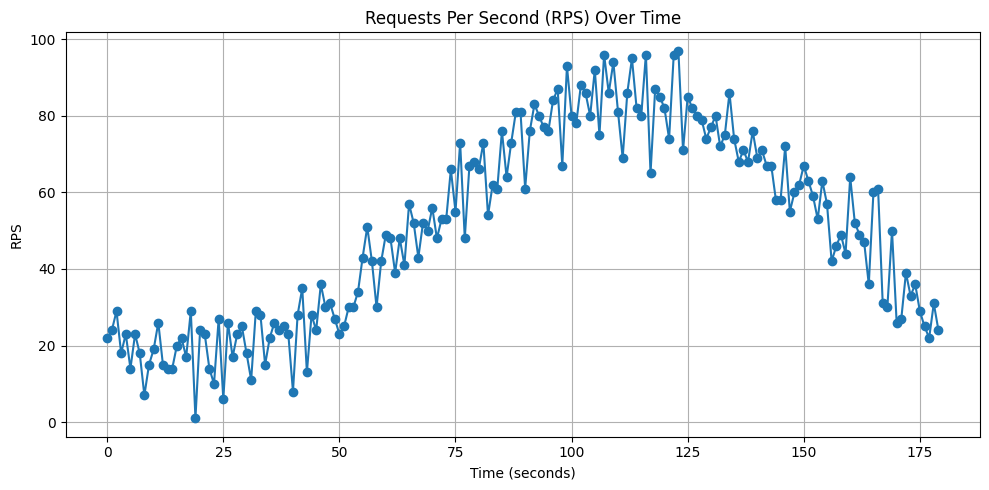

In [2]:
seconds = 180
baseRPS = 50
amplitude = 35
noiseSTD = 7

# Generate time vector
t = np.linspace(0, 2 * np.pi, seconds)

# Sinusoidal pattern + noise
rps = baseRPS + amplitude * np.sin(t - 15) + np.random.normal(0, noiseSTD, seconds)

# Clean it up (no negative RPS)
rps = np.clip(rps, 1, None)

df = pd.DataFrame({'Time': range(seconds), 'RPS': rps.astype(int)})
df.to_csv("workloadProfile.csv", index = False, sep = ';')

# Just to have a visual understanding, let's plot it
plt.figure(figsize = (10, 5))
plt.plot(df['Time'], df['RPS'], marker = 'o')
plt.title('Requests Per Second (RPS) Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('RPS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# File where we have defined the specific workload behaviour
workload = 'workloadProfile.csv'

# Data of the Concurrency Thread Group
concurrencyValues = {

    "TargetLevel": "500",    
    "RampUp": "0",                          
    "Steps": "1",
    "Hold": "3"

}

# Data of the HTTP Request
httpValues = {

    "HTTPSampler.domain": "127.0.0.1",
    "HTTPSampler.port": "80",
    "HTTPSampler.path": "/multiply",
    "HTTPSampler.method": "POST"

}

jsonBody = '''{

    "matrix_a": ${matrix_a},
    "matrix_b": ${matrix_b}

}'''

# Data of the CSV file about the matrices
csvValues = {

    "delimiter": ";",
    "fileEncoding": "US-ASCII",
    "filename": "/Users/fabioschiliro/Desktop/Multidisciplinary Project/MultidisciplinaryProject/JMeter/Matrices.csv",
    "variableNames": "matrix_a,matrix_b",
    "shareMode": "shareMode.all"

}

csvBools = {
    "ignoreFirstLine": "true",
    "quotedData": "false",
    "recycle": "true",
    "stopThread": "false"
}


# Let's create the configuration file now!
configFile = 'jmeterConfigurationFile.jmx'
baseFile = '[Structure] Matrix Multiplication Requests.jmx'

tree = ET.parse(baseFile)
root = tree.getroot()

root = writeConcurrencyThread(root, concurrencyValues)
root = writeHTTPRequest(root, httpValues, jsonBody)
root = writeCSVFile(root, csvValues, csvBools)
root = writeWorkload(root, workload, configFile)

tree.write(configFile, encoding = 'utf-8', xml_declaration = True)
print('File correctly saved!')

File correctly saved!
